<a href="https://colab.research.google.com/github/mihhwiNick/DA_project/blob/hau/Benh_tieu_duong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sử dụng thuật toán ADAP để dự đoán bệnh tiểu đường

##1.Định nghĩa vấn đề
+ **Mô tả**:
   + Bộ dữ liệu gồm 768 mẫu từ bệnh nhân đều là nữ giới, ít nhất 21 tuổi, và có nguồn gốc người da đỏ Pima, sống gần Phoenix, Arizona.
   + 8 đặc điểm được đo từ mỗi mẫu + 1 biến phân loại (có/không mắc tiểu đường)
+ **Dữ liệu vào**:
   + Số lần mang thai (lần)
   + Nồng độ glucose huyết tương sau 2 giờ trong xét nghiệm dung nạp glucose đường uống (mg/dL)
   + Huyết áp tâm trương (mm Hg)
   + Độ dày nếp gấp da cơ tam đầu (mm)
   + Nồng độ insulin huyết thanh sau 2 giờ (mu U/ml)
   + Chỉ số khối cơ thể BMI (kg/m²)
   + Hàm phả hệ tiểu đường ()
   + Tuổi (năm)
   + Biến phân loại (nhị phân)
+ **Dữ liệu ra**:
   + Dự đoán bệnh nhân có tiểu đường không (Biến phân loại 0 hoặc 1)

## 2.Chuẩn bị vấn đề

### 2.1.Khai báo thư viện

In [74]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from PIL import Image
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import urllib.request

import operator
%matplotlib inline

### 2.2.Nạp dữ liệu

In [77]:
#load data
pima = pd.read_csv('https://raw.githubusercontent.com/mihhwiNick/DA_project/refs/heads/main/pima-indians-diabetes.data.csv')
box_plots_img_url = "https://raw.githubusercontent.com/mihhwiNick/DA_project/51ce42872484a1ca280c4ff7c815fb84509cfa7c/images/pima/boxplots.png"
corr1_img_url = "https://raw.githubusercontent.com/mihhwiNick/DA_project/51ce42872484a1ca280c4ff7c815fb84509cfa7c/images/pima/corr1.png"
corr2_img_url ="https://raw.githubusercontent.com/mihhwiNick/DA_project/51ce42872484a1ca280c4ff7c815fb84509cfa7c/images/pima/corr2.png"

## 3.Phân tích dữ liệu

### 3.1.Thống kê mô tả

#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [ ]:
# Get shape
print(f'+ Shape: {pima.shape}')

# Get types
print(f'\n+ Data Types:\n{pima.dtypes}')

# Check the first 5 rows (head)
print('\n+ First 5 rows:')
display(pima.head(5))

# Check the last 5 rows (tail)
print('\n+ Last 5 rows:')
display(pima.tail(5))

# info
print('\n + Basic Information: ')
pima.info()

+ Shape: (768, 9)

+ Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

+ First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



+ Last 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0



 + Basic Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


** Nhận xét **
+ Dữ liệu có 8 tính chất để phân lớp: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
+ Các giá trị đều là số học, thuộc kiểu int64 và float64
+ Tổng số dòng dữ liệu là 768 dòng
+ Dữ liệu phân lớp nằm ở cột Outcome, gồm 2 giá trị: 0 (không mắc bệnh) và 1 (mắc bệnh)


#### (2) Phân loại tình trạng dinh dưỡng theo BMI

In [ ]:
# Tạo cột Nutritional Status
Nutritional_status = pd.Series([])

In [ ]:
# Nutritional Status dựa trên BMI
for i in range(len(pima)):
    if pima['BMI'][i] == 0.0:
        Nutritional_status[i]="Không có dữ liệu"

    elif pima['BMI'][i] < 18.5:
        Nutritional_status[i]="Thiếu cân"

    elif pima['BMI'][i] < 25:
        Nutritional_status[i]="Bình thường"

    elif pima['BMI'][i] >= 25 and pima['BMI'][i] < 30:
        Nutritional_status[i]="Thừa cân"

    elif pima['BMI'][i] >= 30:
        Nutritional_status[i]="Béo phì"

    else:
        Nutritional_status[i]= pima['BMI'][i]

In [ ]:
# Thêm cột Nutritional Status
pima.insert(6, "Nutritional Status", Nutritional_status)

In [ ]:
# Kiểm tra dữ liệu sau khi thêm cột mới
pima.head (5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Nutritional Status,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Béo phì,0.627,50,1
1,1,85,66,29,0,26.6,Thừa cân,0.351,31,0
2,8,183,64,0,0,23.3,Bình thường,0.672,32,1
3,1,89,66,23,94,28.1,Thừa cân,0.167,21,0
4,0,137,40,35,168,43.1,Béo phì,2.288,33,1


In [ ]:
print('Bảng phân bố tình trạng dinh dưỡng')
# số lượng trạng thái dinh dưỡng
amount = pima['Nutritional Status'].value_counts()

# Tính phần trăm (dựa trên tổng số mẫu)
percentage = (amount / len(pima) * 100).round(2)

# Tạo DataFrame kết hợp số lượng và phần trăm
bang_ket_qua = pd.DataFrame({
    'Số lượng': amount,
    'Phần trăm (%)': percentage
})
print(bang_ket_qua)

Bảng phân bố tình trạng dinh dưỡng
                    Số lượng  Phần trăm (%)
Nutritional Status                         
Béo phì                  472          61.46
Thừa cân                 179          23.31
Bình thường              102          13.28
Không có dữ liệu          11           1.43
Thiếu cân                  4           0.52


**Nhận xét**:
+ Nhóm "Béo phì" chiếm tỷ lệ áp đảo (61.46%) trong dân số Pima, trong khi nhóm "Thiếu cân" chỉ chiếm 0.52%, phản ánh xu hướng thừa cân rõ rệt trong cộng đồng này.
+ Trong tổng số 768 phụ nữ, có 11 người không có thông tin về BMI. Chỉ 102 người có cân nặng bình thường và 4 người thuộc nhóm thiếu cân; phần lớn còn lại thuộc nhóm thừa cân hoặc béo phì, phản ánh xu hướng dinh dưỡng mất cân đối và cho thấy mối liên hệ tiềm năng giữa tình trạng dinh dưỡng và nguy cơ mắc tiểu đường.

#### (3) Kiểm tra tính toàn vẹn của dữ liệu
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [ ]:
has_null = pima.isnull().sum().any()
has_nan  = pima.isna().sum().any()
n_duplicated = pima.duplicated().sum()

print('Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(pima[pima.isnull().any(axis=1)])

print(f'+ Có giá trị NaN: {has_nan}')
if has_nan:
    display(pima[pima.isna().any(axis=1)])

print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated > 0:
    # Ví dụ: kiểm tra dòng trùng cụ thể
    s_query1 = "`Pregnancies`==6 and `Glucose`==148 and `Outcome`==1"
    s_query2 = "`Pregnancies`==1 and `Glucose`==85 and `Outcome`==0"
    display(pima.query(s_query1))
    display(pima.query(s_query2))
    display(pima[pima.duplicated()])

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị NaN: False
+ Số dòng trùng: 0


**Nhận xét**:
+ Dữ liệu không có dòng bị trùng
+ Dữ liệu không có giá trị rỗng (NaN, Null)

#### (4) Các tính chất thống kê trên dữ liệu số

*   Count, Mean, Standard Deviation, Minimum Value
*   25th Percentile, 50th Percentile (Median), 75th Percentile,Maximum Value

In [ ]:
description = pima.describe().T
display(description)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### (5)Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)

In [ ]:
pima['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


#### (6) **Mối tương quan giữa các tính chất (Correlations)**

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả.

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn.

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

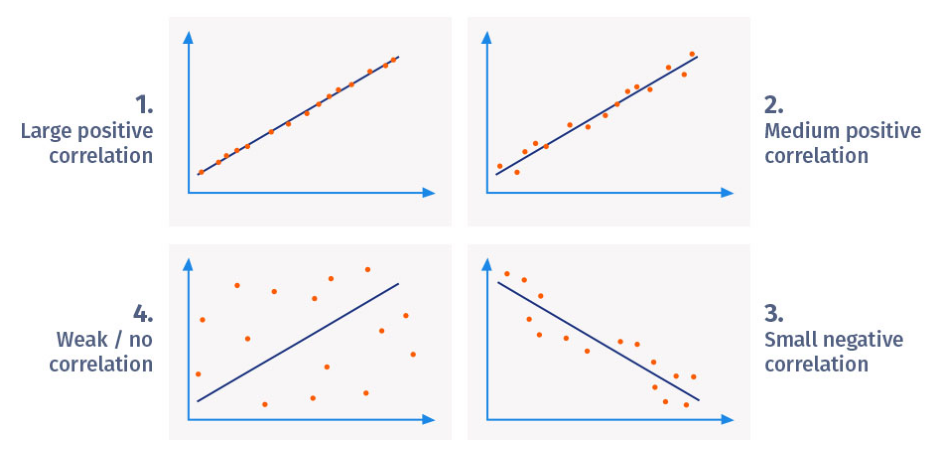

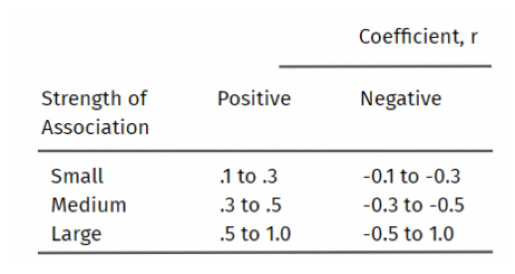

In [79]:
with urllib.request.urlopen(corr1_img_url) as url:
    corr1_img = Image.open(url)
with urllib.request.urlopen(corr2_img_url) as url:
    corr2_img = Image.open(url)


plt.figure(figsize=(12, 6));
plt.imshow(corr1_img), plt.axis("off"), plt.show();
plt.imshow(corr2_img), plt.axis("off"), plt.show();

In [18]:
correlations = pima.corr(method='pearson')
display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Nhận xét**:
+ Các cặp tính chất có độ tương đồng cao:
    + (Outcome, Glucose) = 0.466581
    

### 3.2.Hiển thị dữ liệu

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

**Box and whisker plots**
+ https://www.simplypsychology.org/boxplots.html
+ So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
+ So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
+ Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
+ Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    + Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    + Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    + Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

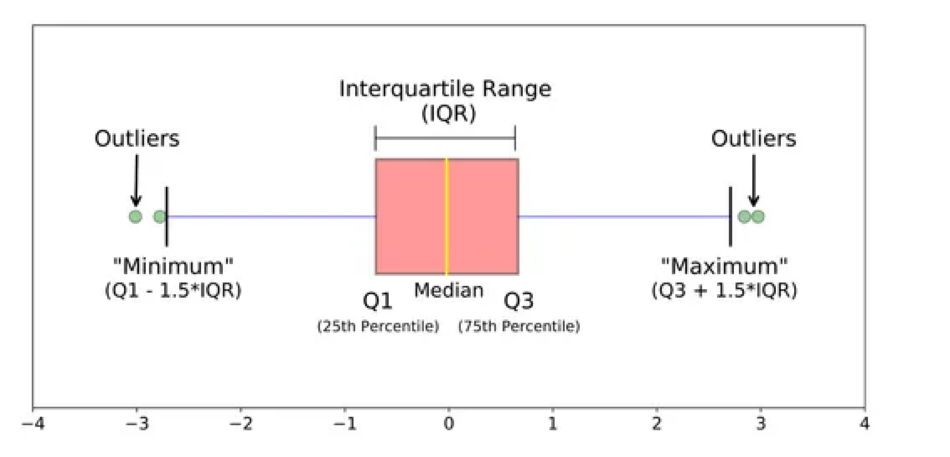

In [75]:
with urllib.request.urlopen(box_plots_img_url) as url:
    box_plots_img = Image.open(url)


plt.figure(figsize=(12, 6)), plt.imshow(box_plots_img), plt.axis("off"), plt.show();

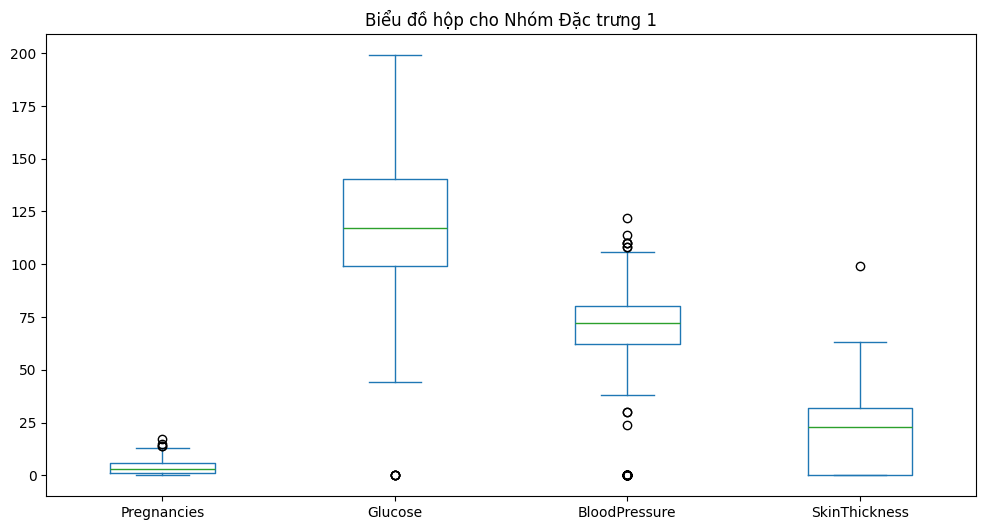

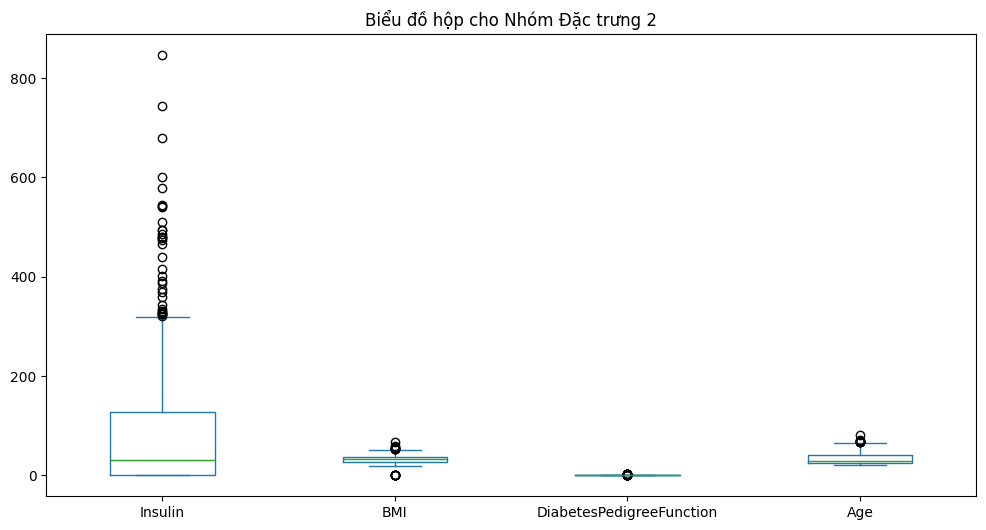

In [76]:
# Tạo một DataFrame mới bằng cách loại bỏ cột 'Outcome'
pima_features = pima.drop('Outcome', axis=1)

# Chia các đặc trưng thành hai nhóm
group1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']
group2 = ['Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Vẽ biểu đồ hộp cho nhóm 1
pima_features[group1].plot(kind="box", sharex=False, sharey=False, figsize=(12, 6))
plt.title('Biểu đồ hộp cho Nhóm Đặc trưng 1')
plt.show()

# Vẽ biểu đồ hộp cho nhóm 2
pima_features[group2].plot(kind="box", sharex=False, sharey=False, figsize=(12, 6))
plt.title('Biểu đồ hộp cho Nhóm Đặc trưng 2')
plt.show()

Nhận xét:


**Biểu đồ Histogram**

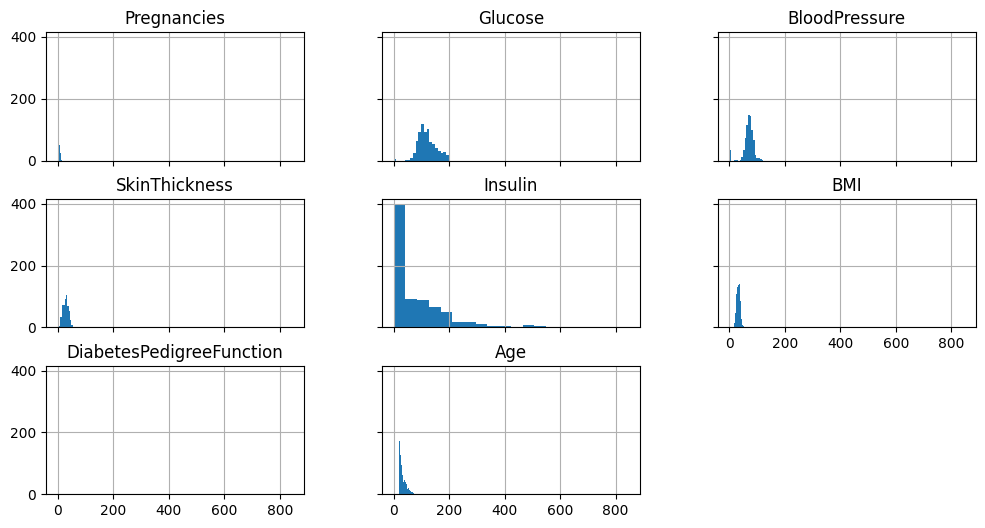

In [20]:
pima_features.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

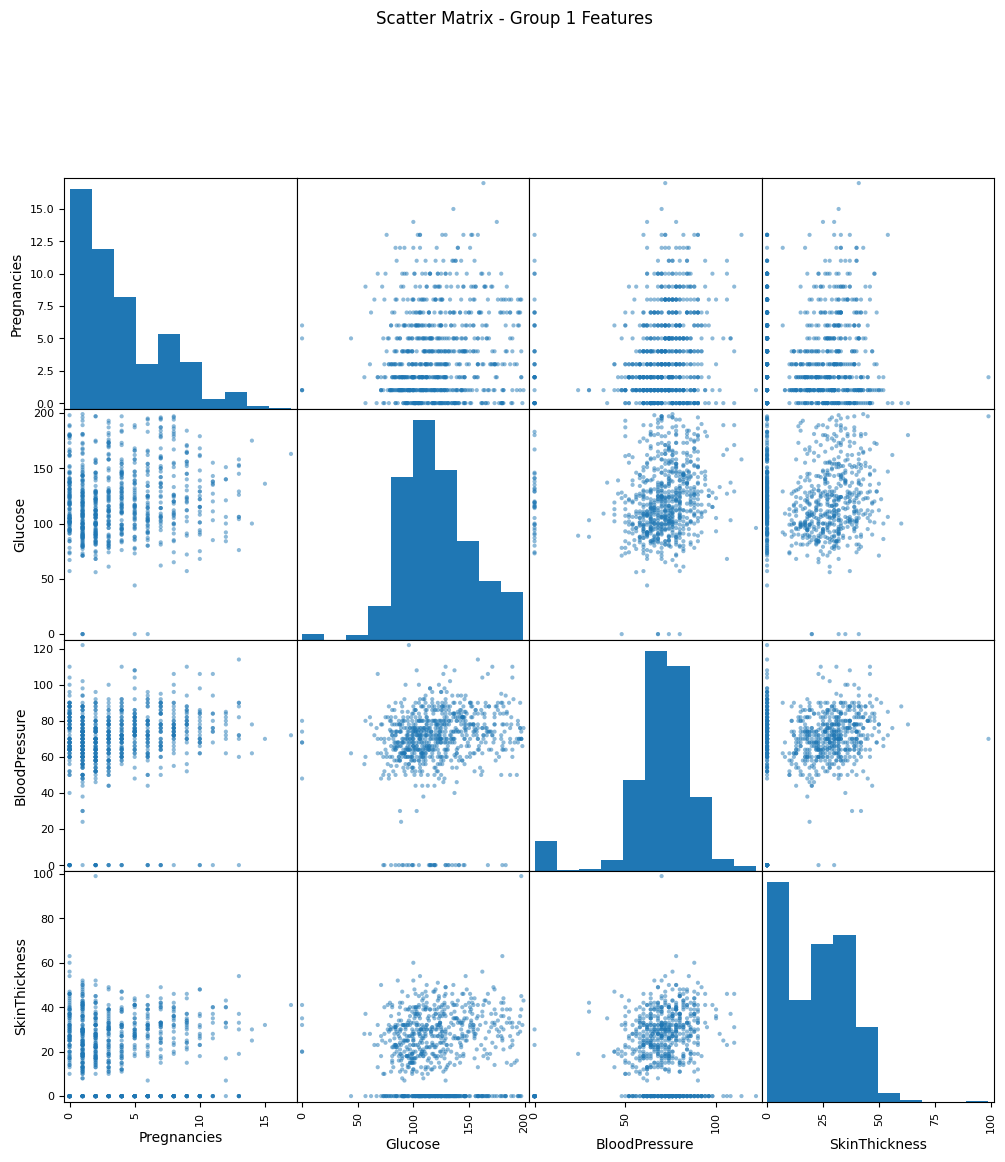

In [80]:
# Vẽ ma trận biểu đồ phân tán cho nhóm 1
pd.plotting.scatter_matrix(pima_features[group1], figsize=(12, 12))
plt.suptitle('Scatter Matrix - Group 1 Features', y=1.02)
plt.show()


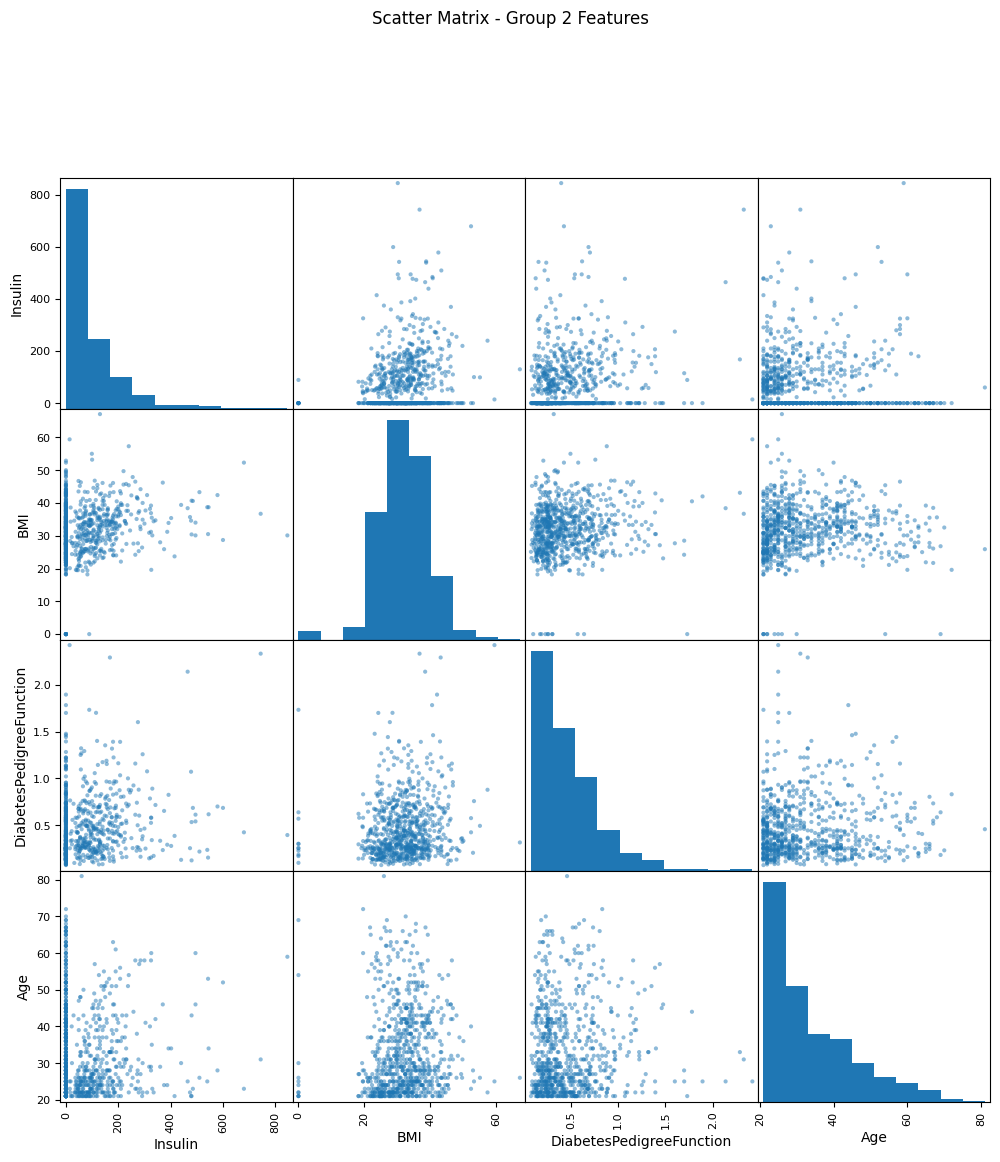

In [81]:
# Vẽ ma trận biểu đồ phân tán cho nhóm 2
pd.plotting.scatter_matrix(pima_features[group2], figsize=(12, 12))
plt.suptitle('Scatter Matrix - Group 2 Features', y=1.02)
plt.show()


## Chuẩn bị làm sạch dữ liệu

### 4.1. Làm sạch dữ liệu (Data Cleaning)

#### (1) **Tạo bảng dữ liệu làm sạch**
+ Chỉ giữ lại các cột Input, Ouput

In [55]:
df_clean = pima.copy()

#### (2) **Xóa dữ liệu trùng nhau**

In [27]:
display(pima[pima.duplicated()])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Kết luận**
*   Không có dữ liệu trùng nhau

##### Example

Nếu có giá trị trùng nhau thì chúng ta có thể giải quyết như sau:
+ Xóa các dòng bị trùng lặp và đặt lại chỉ mục:
```python
df.drop_duplicates(ignore_index=True, inplace=True)
```

#### (3) **Xử lý giá trị rỗng, không hợp lệ**

In [28]:
has_null = pima.isnull().sum().any()
has_nan  = pima.isna().sum().any()
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(pima[pima.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(pima[pima.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị Nan: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm:

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm:

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)
```

#### (4) Xử lí giá trị "0" không hợp lệ

In [56]:
# Danh sách các cột có giá trị 0 là bất thường
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Hiển thị số lượng giá trị 0 ban đầu trong các cột
print("Số lượng giá trị 0 trong mỗi cột (trước khi xử lý):")
print((df_clean[cols_to_replace] == 0).sum())

# Thay thế các giá trị 0 bằng giá trị trung vị (median) của từng cột
for col in cols_to_replace:
    median_val = df_clean[col].median()
    df_clean[col] = df_clean[col].replace(0, median_val)

# Hiển thị số lượng giá trị 0 sau khi xử lý để xác nhận
print("\nSố lượng giá trị 0 trong mỗi cột (sau khi xử lý):")
print((df_clean[cols_to_replace] == 0).sum())


Số lượng giá trị 0 trong mỗi cột (trước khi xử lý):
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

Số lượng giá trị 0 trong mỗi cột (sau khi xử lý):
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


### 4.2. Biến đổi dữ liệu (Data Transforms)

#### (1) Chuyển đổi dữ liệu danh mục (Category) thành dữ liệu số

In [59]:
class_encoder = LabelEncoder()
class_encoder.fit(df_clean["Outcome"])
class_names = class_encoder.classes_
print(class_names)

[0 1]


**Kết Luận**
+ biến Outcome là một biến phân loại, nhưng vì nó đã ở dạng số (0 và 1), nên không cần thực hiện bước chuyển đổi bằng LabelEncoder.

#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn.

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [60]:
# Chuẩn hóa Min-Max
scale_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1


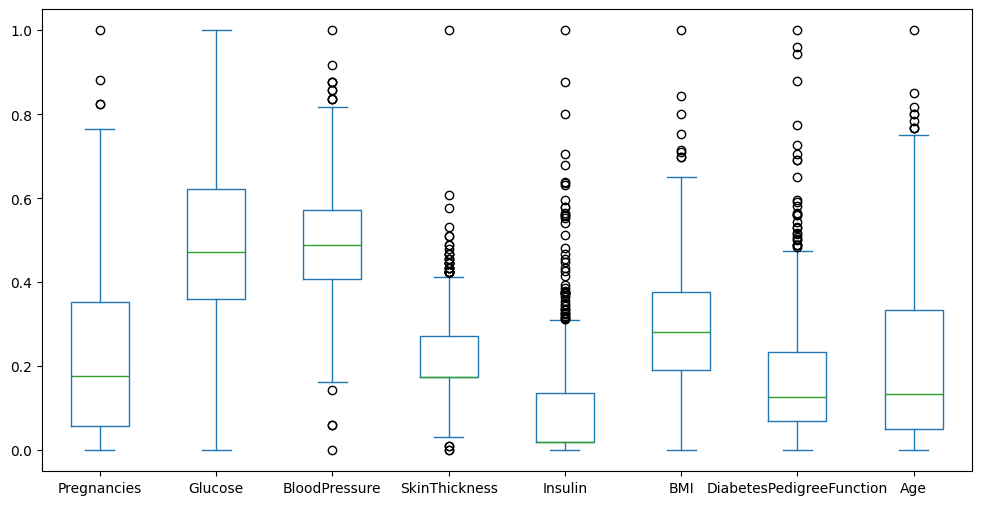

In [61]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [62]:
# Chuẩn hóa tiêu chuẩn
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.831114,-0.608201,0.167240,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,0.180566,-0.608201,-0.851551,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.469981,-0.608201,-1.331838,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.831114,0.695378,1.549885,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.240633,0.809145,0.065361,-0.908682,2.532136,0
764,-0.547919,0.011301,-0.197433,-0.036283,-0.608201,0.632973,-0.398282,-0.531023,0
765,0.342981,-0.021574,-0.031990,-0.469981,0.164466,-0.909768,-0.685193,-0.275760,0
766,-0.844885,0.142800,-1.024647,-0.469981,-0.608201,-0.342155,-0.371101,1.170732,1


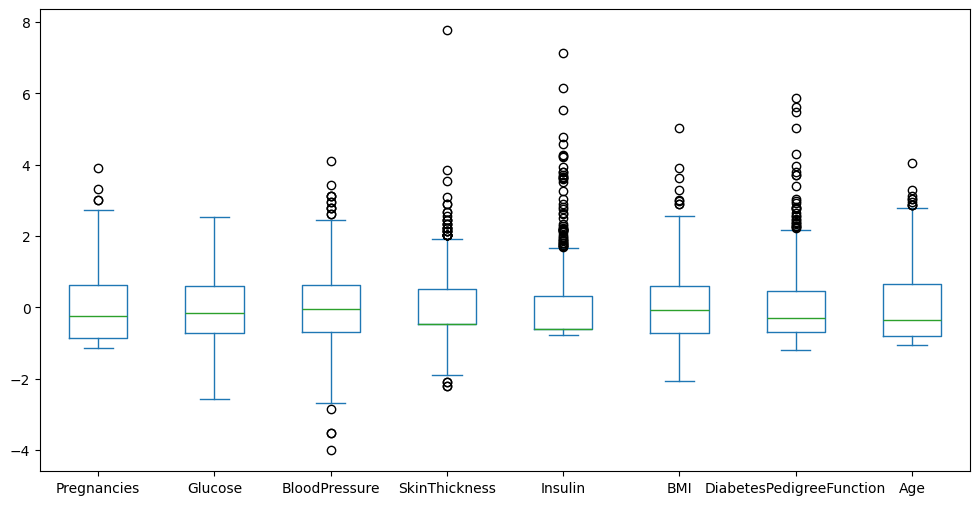

In [63]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [64]:
correlations = df_clean_standard.corr(method='pearson')
display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [65]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 3.050e+01 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 3.050e+01 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 2.300e+01 3.050e+01 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 2.300e+01 3.050e+01 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 7.200e+01 2.300e+01 3.050e+01 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 2.300e+01 3.050e+01 3.200e+01 2.320e-01
  5.400e+01]
 [4.000e+00 1.100e+02 9.200e+01 2.300e+01 3.050e+01 3.760e+01 1.910e-01
  3.000e+01]
 [1.000e+01 1.680e+02 7.400e+01 2.300e+01 3.050e+01 3.800e+01 5.3

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 8)
Input = 
[[ 13.    106.     70.     23.     30.5    34.2     0.251  52.   ]
 [  4.    109.     64.     44.     99.     34.8     0.905  26.   ]
 [  5.    143.     78.     23.     30.5    45.      0.19   47.   ]
 [  5.     99.     54.     28.     83.     34.      0.499  30.   ]
 [  0.    113.     76.     23.     30.5    33.3     0.278  23.   ]]
Output = [0. 1. 0. 0. 1.]
+ Test: shape=(231, 8)
Input = 
[[  0.    147.     85.     54.     30.5    42.8     0.375  24.   ]
 [ 13.    152.     90.     33.     29.     26.8     0.731  43.   ]
 [  7.    100.     72.     23.     30.5    30.      0.484  32.   ]
 [  1.     95.     82.     25.    180.     35.      0.233  43.   ]
 [  5.    115.     98.     23.     30.5    52.9     0.209  28.   ]]
Output = [0. 1. 1. 1. 1.]


# Kết thúc